# How have each of the schools developed over time?
# How do the schools differ at different time periods?
# Did schools develop differently?
#### Here, we are looking a form of term frequencies (`TFIDF`) of all of the books for each school, based on a time slice. Thus, each graph will consist of 24 points: 6 for each time period within the 4 schools [`Ḥanafī`, `Mālikī`, `Shāfiʿī`, and `Ḥanbalī`].

| Era |  Time Range |                      | (Num Books) Ḥanafī | Mālikī | Shāfiʿī | Ḥanbalī |
|:---:|:-----------:|:--------------------:|:------------------:|:------:|:-------:|:-------:|
|  0  | 0200 - 0500 | Initial Codification |          7         |    2   |    2    |    6    |
|  1  | 0200 - 0500 |        Schools       |          6         |   18   |    8    |    10   |
|  2  | 0500 - 0700 |         Major        |         10         |   12   |    15   |    12   |
|  3  | 0700 - 0900 |     Commentaries     |         10         |    8   |    10   |    12   |
|  4  | 0900 - 1250 |        Indstrl       |         10         |   17   |    16   |    20   |
|  5  | 1250 - 1450 |     Modern Times     |          5         |    9   |    9    |    17   |

## The goal here is to focus on three aspects of law:
#### 1. How often are schools referenced within texts? Is there a constant theoretical back and forth? Is one group left totally out? Are there any two that hold a strong rivalry? How has that changed over time?
#### 2. Which *legal terms* do schools use and prefer? We know that each school has their own set of principles, but is that quantitatively apparent from written texts? How has that changed over time?
#### 3. How does each school bring narrated proofs? Are some heavy users of narrations of the Prophet? Are some more likely to quote a certain source? How has that changed over time?

In [1]:
# Load needed libraries

import re
import json
import seaborn as sns
import arabic_reshaper as a_r
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg

%matplotlib inline

In [2]:
# dict to hold tfidf values - used to plot
spec_word_dict = {}

# conssitent clean mellow color palatte
current_palette = sns.color_palette()

category_graphs = {
    134: ['Ḥanafī', current_palette[0]],
    135: ['Mālikī', current_palette[1]],
    136: ['Shāfiʿī', current_palette[2]],
    137: ['Ḥanbalī', current_palette[3]],
}

# load term frequency values
with open('../../data/all_word_freqs_99.json', 'r') as f:
        all_word_freqs = json.load(f)

In [3]:
# search for the first instance of the word (with matching regex)
# save the tfiddf value to the category and era

def tf_time_of_word(spec_word_dict, word, pattern, max_thres=5, *args, **kwargs):
    spec_word_dict[word] = {}
    wrong = kwargs.get('wrong', re.compile("ااااااااا"))

    for category in range(len(all_word_freqs)):
        spec_word_dict[word][category] = {}
        for era in range(len(all_word_freqs[category])):
            for w_f in all_word_freqs[category][era]:
                if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                    spec_word_dict[word][category][era] = w_f[1]
                    break

In [4]:
# single plot of word over time per category
# used initially, but plots got large

def plot_freq_time(word):
    f,ax = plt.subplots(figsize=(20,10))
    for i,category in enumerate(category_graphs):
        ax.plot(list(spec_word_dict[word][i].values()),label=category_graphs[category][0],color=category_graphs[category][1],
                linewidth = 5, linestyle = '-', alpha=.7)

    ax.legend(fontsize=15)
    ax.set_xlabel("Lunar Year", fontsize=19);
    ax.set_ylabel("Word Frequency", fontsize=19);
    ax.set_xticklabels([0,200,500,700,900,1250,1500], fontsize=15);
    [tick.label.set_fontsize(15) for tick in ax.yaxis.get_major_ticks()]
    ax.set_title("Use of the word '{}'".format((bidialg.get_display(word))), fontsize=25);
    plt.savefig('../../images/time/'+str(word)+'.png')

In [5]:
# plot all needed word-era-school frequencies
# save the plot as a png
# focus on key words - post EDA plots

def plot_multiple_time(xc,yc,words,title):
    f,axes = plt.subplots(xc,yc,figsize=(23,15))
    for ax,word in zip(axes.flatten(),words):
        for i,category in enumerate(category_graphs):
            ax.plot(list(spec_word_dict[word][i].values()),label=category_graphs[category][0],color=category_graphs[category][1],
                    linewidth = 5, linestyle = '-', alpha=.7)

        ax.legend(fontsize=9)
        ax.set_xlabel("Lunar Year", fontsize=13);
        ax.set_ylabel("Word Frequency", fontsize=13);
        ax.set_xticklabels([0,200,500,700,900,1250,1500], fontsize=11);
        [tick.label.set_fontsize(11) for tick in ax.yaxis.get_major_ticks()]
        ax.set_title("Use of the word '{}'".format((bidialg.get_display(word))), fontsize=15);
        plt.tight_layout()
        plt.savefig('../../images/time/'+str(title)+'.png')

# Words related to the *Codifiers*
Looking at references to the codifiers of the schools:
1. Abū Ḥanīfah
2. Mālik
3. Shāfiʿī
4. Aḥmad ibn Ḥanbal

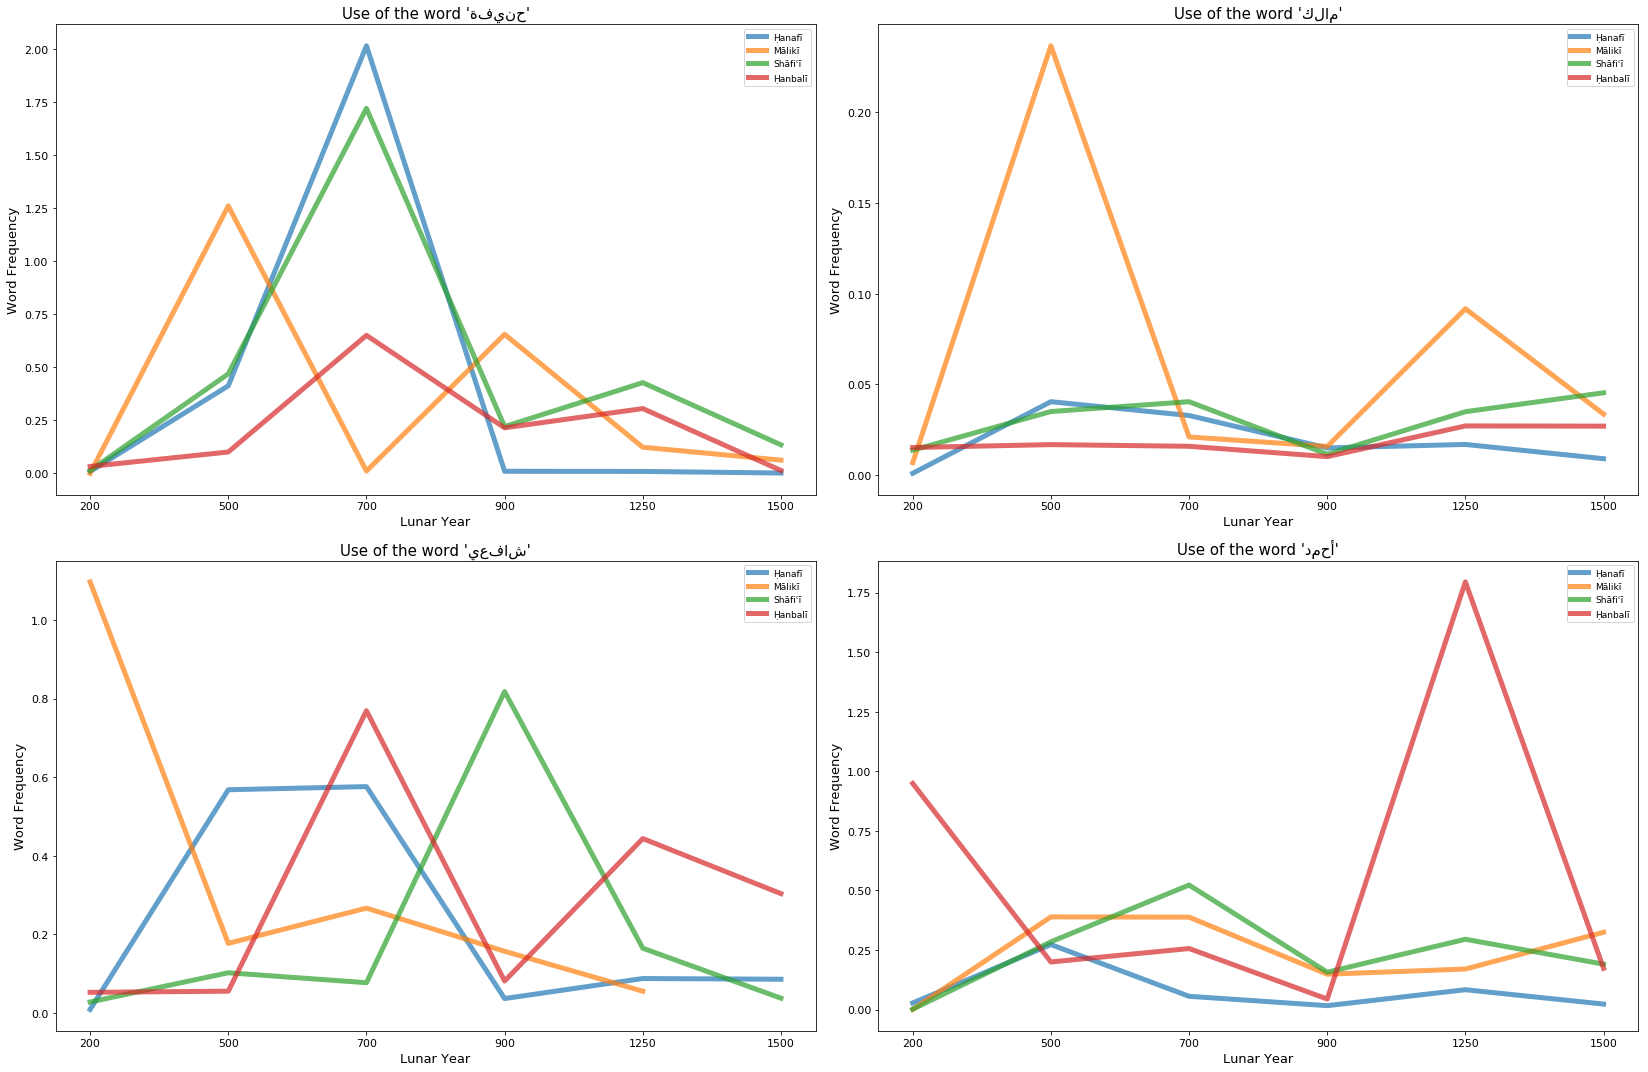

In [6]:
tf_time_of_word(spec_word_dict, word='حنيفة', pattern=re.compile("[أبلو]*حن[ا]*[ي]*ف[ي]*[ة]*"))
tf_time_of_word(spec_word_dict, word='مالك', pattern=re.compile("مالك[يا]*[^هموة][و]*"))
tf_time_of_word(spec_word_dict, word='شافعي', pattern=re.compile("[الو]*شافعي[ة]*"))
tf_time_of_word(spec_word_dict, word='أحمد', pattern=re.compile("[وفاأل]*[اأ]حمد"))

plot_multiple_time(2,2,['حنيفة','مالك','شافعي','أحمد'],'four_imams');

Here we see some trends that are expected, and others that aren't.
Expected:
- Heavy reference to `Mālik` by early Malikīs.
- Heavy reference to `Aḥmad` in the first generation of `Ḥanbalīs`. This is most likely due to the first 4-6 works in that era being of the type "The Opinions of Imām Aḥmad by *such and such* student".

Somewhat Expected:
- Heavy reference to `Abū Ḥanīfah` by not only mid-generation Ḥanafīs but also Shāfiʿīs. This is expected, but the fact that the references sky rocket during the 700's in an interesting thing to note.

Unexpected:
- Extremely high amount of references to `Aḥmad` in moden times by Ḥanbalīs.
- `Shāfiʿī` being referenced a lot throughout the generations. Especially the huge spike in the first generation of Mālikīs.

## Overall Insights:
`Abū Ḥanīfah` and `Shāfiʿī` are referenced often by all 4 schools, and this has been a continuous trend over the centuries.

# Words related to *legal terms*
This will truly allow scholars of Islamic law to visualize how these traits differ from school to school, and how they've changed over time.

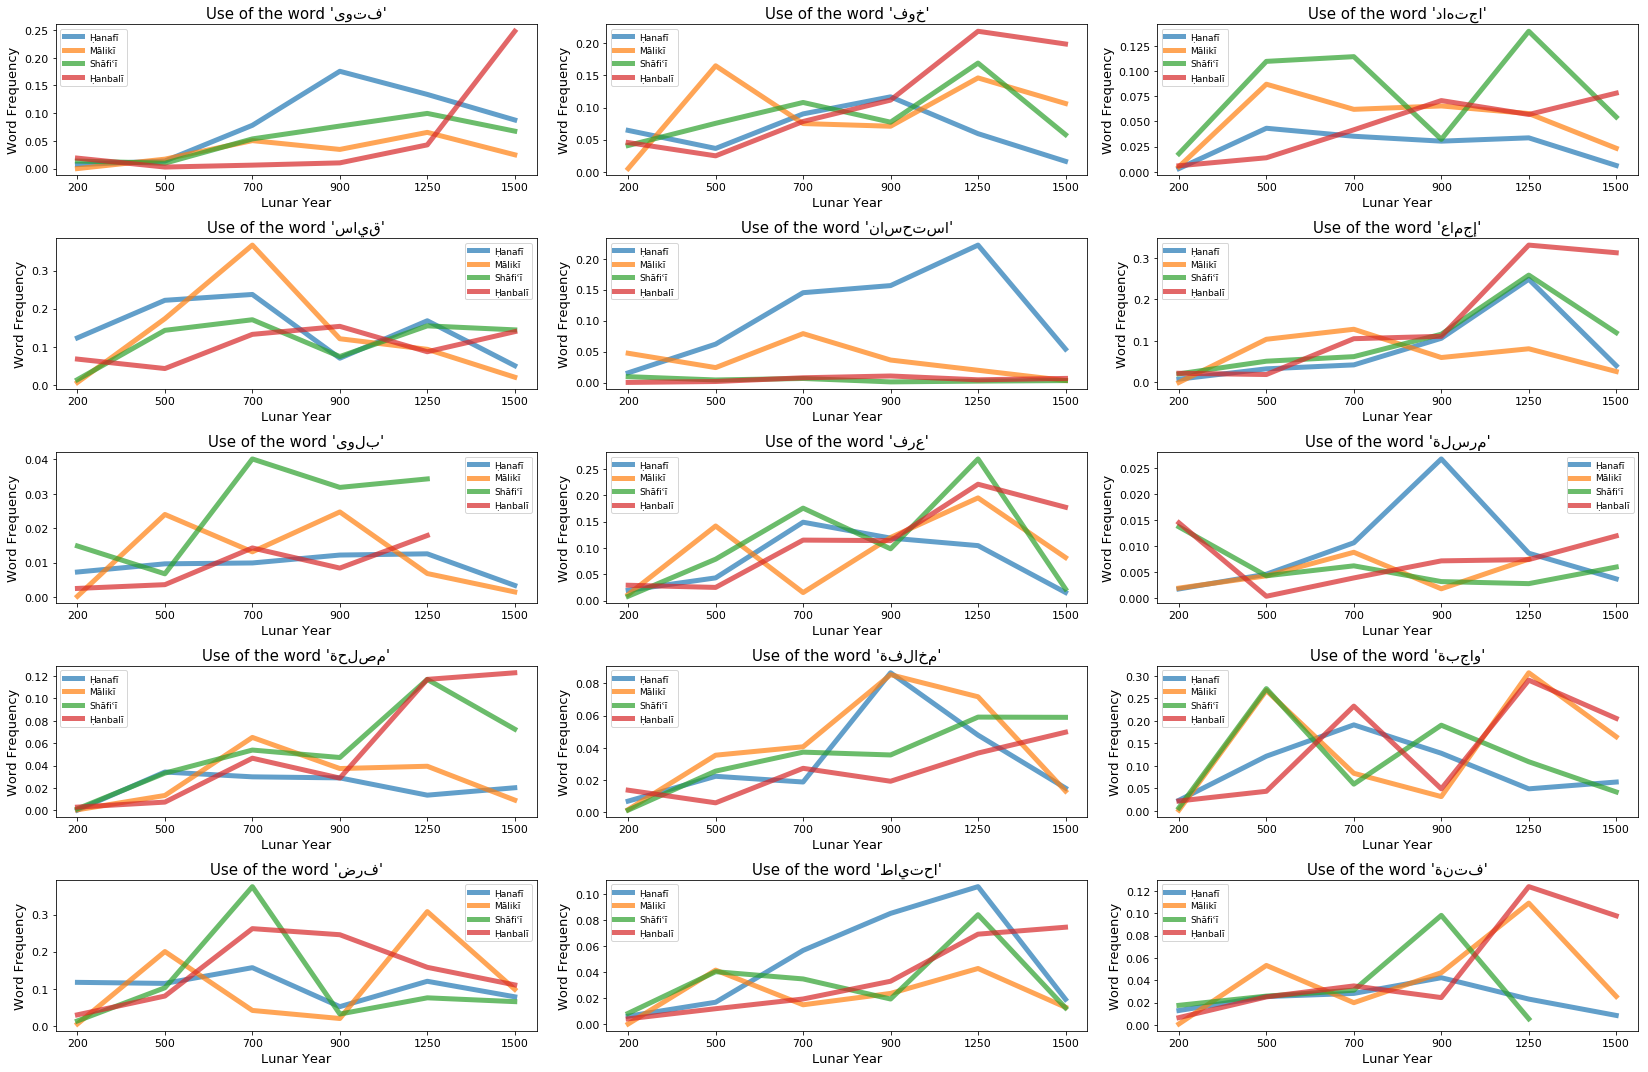

In [7]:
tf_time_of_word(spec_word_dict, word='قياس', pattern=re.compile("[فالو]*[م]*قي[ا]*س"))
tf_time_of_word(spec_word_dict, word='استحسان', pattern=re.compile("[الو]*استحسان"))
tf_time_of_word(spec_word_dict, word='إجماع', pattern=re.compile("[الو]*[اإ]جماع"))
tf_time_of_word(spec_word_dict, word='بلوى', pattern=re.compile("[الوف]*بلو[ٍىي]"))
tf_time_of_word(spec_word_dict, word='عرف', pattern=re.compile("[الوف]*عرف$"))
tf_time_of_word(spec_word_dict, word='مرسلة', pattern=re.compile("[الوف]*مرسلة"))
tf_time_of_word(spec_word_dict, word='مصلحة', pattern=re.compile("[الوف]*مصلحة"))
tf_time_of_word(spec_word_dict, word='مخالفة', pattern=re.compile("[الوف]*مخالفة"))
tf_time_of_word(spec_word_dict, word='واجبة', pattern=re.compile("[الوف]*واجب[ة]*"))
tf_time_of_word(spec_word_dict, word='فرض', pattern=re.compile("[الوف]*فرض[ية]*"))
tf_time_of_word(spec_word_dict, word='احتياط', pattern=re.compile("[البوف]*احتياط[ا]*"))
tf_time_of_word(spec_word_dict, word='فتنة', pattern=re.compile("[البوف]*فتنة"))
tf_time_of_word(spec_word_dict, word='اجتهاد', pattern=re.compile("[الوفبم]*جته[ا]*د[ه]*"))
tf_time_of_word(spec_word_dict, word='خوف', pattern=re.compile("[الويفم]*خ[او]ف[ة]*"))
tf_time_of_word(spec_word_dict, word='فتوى', pattern=re.compile("[الوفم]*فت[اوى]*$"))

plot_multiple_time(5,3,['فتوى','خوف','اجتهاد','قياس','استحسان','إجماع','بلوى','عرف','مرسلة','مصلحة','مخالفة','واجبة','فرض','احتياط','فتنة'],'legal_terms');

`Qiyās` [Analogical Reasoning] is something that `Ḥanafīs` are known for. Although they are the most consistently dominant users of that phrase, there is an add jump with medieval `Mālikīs` who heavily used that phrase. This is probably a result of heavy Mālikī influence and control in Muslim Spain, and when faced with many new issues — while being the primary law makers of that era — turned to `Qiyās` [Analogical Reasoning] to formulate law in a suitable manner.

`Istiḥsān` [Preferring a less common source of law over analogy] is a method of law used almost exclusively by the `Ḥanafīs` and that is quite clear.

`Ijmāʿ` [Scholarly Agreement] is used by all the schools, however we see that over time, especially at the turn of the lunar millennium, there was a huge use of `Ijmāʿ`. This could be a result of many new ideas being incorporated into the religion as a result of colonialism and European powers brainwashing the masses, and the scholars reacting with a concept of "this has always been in Islam."

Interesting, since *`balwā`* is often thought to be a *`Ḥanafī`* phrase.

`ʿUrf` [Societal Norms] are, in books, seen as a back and forth issue, but we can see that, aside from a drop in its use by the medieval `Mālikīs`, it's become a more common place legal term. Another thing to note, which is extremely surprising, is that, medieval `Mālikīs` heavily referenced `Qiyās` but used very little `ʿUrf`.

In the context of `al-Maṣlaḥah al-Mursalah` [Common Good] isn't used often, but the `Ḥanafīs` did make a strong use of it in the 900s. Probably as a result of government power involving `Ḥanafī` judges.

`Ḥanafīs` used increasingly more `Iḥtiyāṭ` [Caution] over the years, with a heavy drip in recent years.

`Ḥanbalīs` have seen a huge influx in `Fitnah` [Societal Issues] arise in the last generation.

# ًWords related to *Narrators*

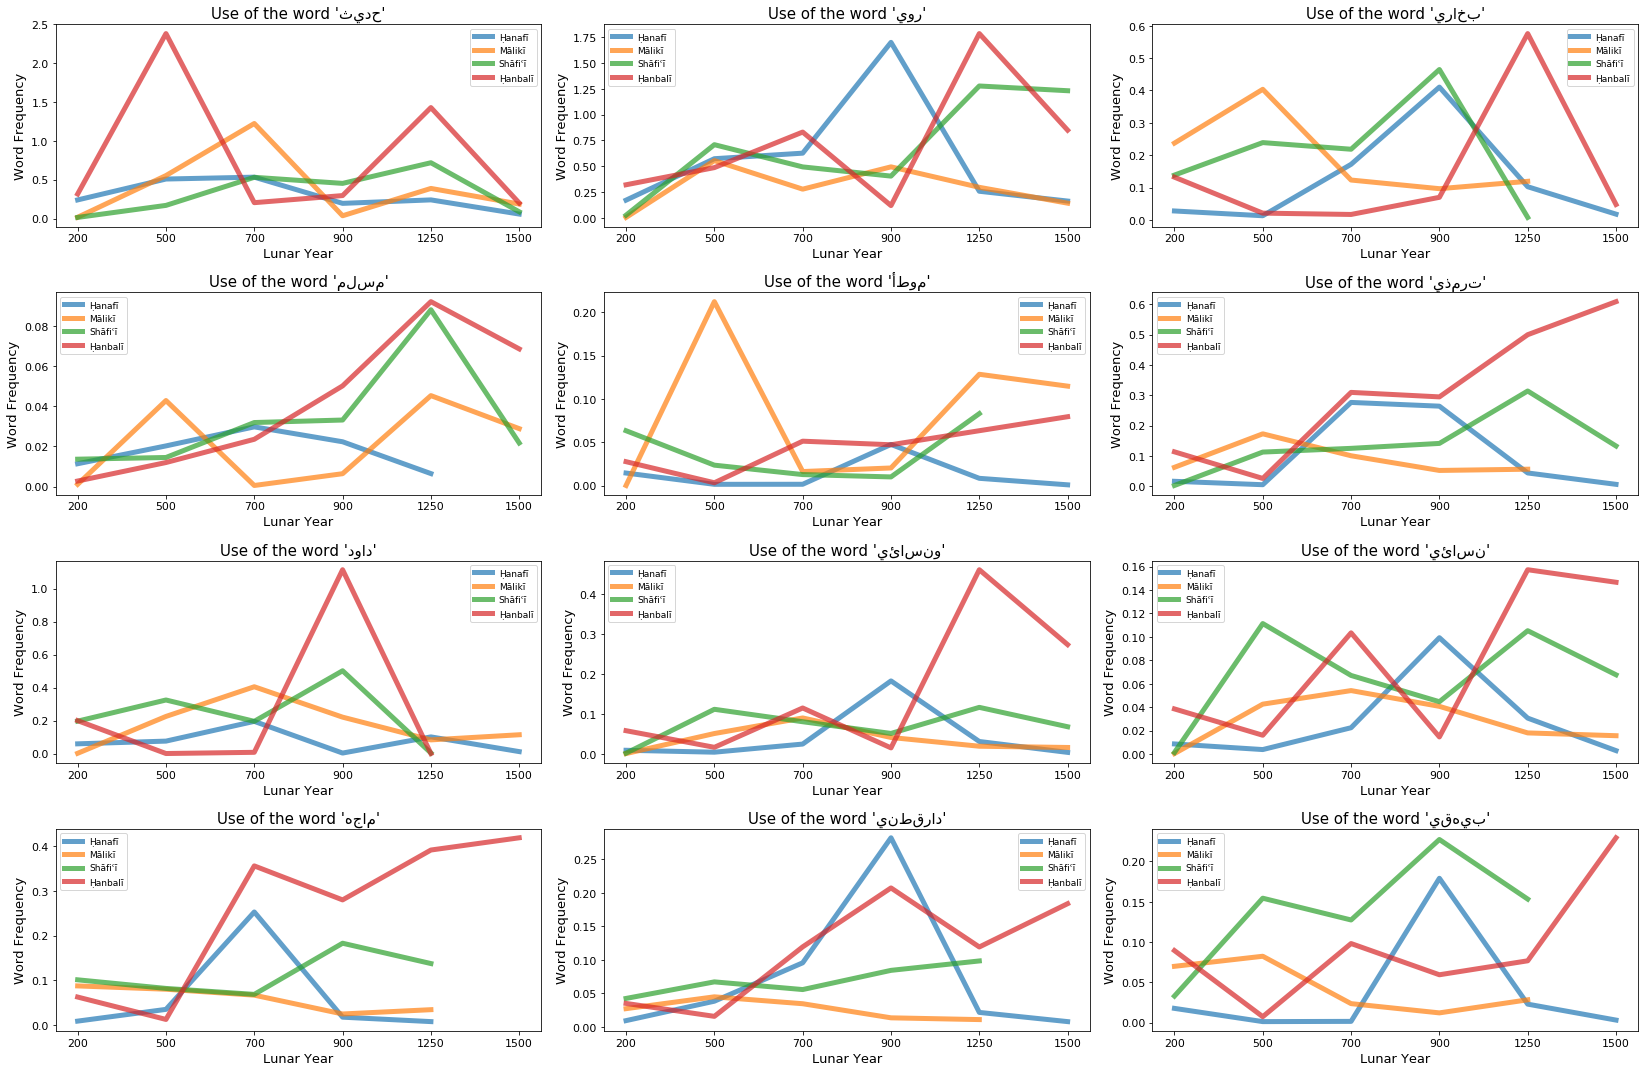

In [8]:
tf_time_of_word(spec_word_dict, word='حديث', pattern=re.compile("[الفو]*[ل]*حد[ي]*ث"), wrong=re.compile("للحدث"))
tf_time_of_word(spec_word_dict, word='روي', pattern=re.compile("رو[ا]*[هيى][ة]*"))
tf_time_of_word(spec_word_dict, word='بخاري', pattern=re.compile("[الو]*بخاري"))
tf_time_of_word(spec_word_dict, word='مسلم', pattern=re.compile("[و]*لمسلم$"))
tf_time_of_word(spec_word_dict, word='موطأ', pattern=re.compile("[الو]*موطأ"))
tf_time_of_word(spec_word_dict, word='ترمذي', pattern=re.compile("[الو]*ترمذي"))
tf_time_of_word(spec_word_dict, word='داود', pattern=re.compile("دا[و]د"))
tf_time_of_word(spec_word_dict, word='ونسائي', pattern=re.compile("[الو]*نسائي"))
tf_time_of_word(spec_word_dict, word='نسائي', pattern=re.compile("[ال]*نسائي"))
tf_time_of_word(spec_word_dict, word='ماجه', pattern=re.compile("[نو]*ماج[هة]"))
tf_time_of_word(spec_word_dict, word='دارقطني', pattern=re.compile("[الو]*دارقطني"))
tf_time_of_word(spec_word_dict, word='بيهقي', pattern=re.compile("[الو]*بيهقي"))

plot_multiple_time(4,3,['حديث','روي','بخاري','مسلم','موطأ','ترمذي','داود','ونسائي','نسائي','ماجه','دارقطني','بيهقي'], 'hadtih_books');

## Overall, when it comes to using `Ḥadīth` as a source, there has been an increase. Most schools have had an era of heavy ḥadīth usage, and that is probably in part by the schools starting to refute other opinions within their texts, and using narrations as a backup proof.

This is very interesting. *`al-Nasāʾī`* isn't quoted too often. However, the `Ḥanbalīs` very often quote *`and al-Nasāʾī`* as a reference. This isn't something I normally check for, but this was a clear difference in this case.

In [9]:
# Used for testing

def printer(spec_word_dict, word, pattern, max_thres=5, *args, **kwargs):
    wrong = kwargs.get('wrong', re.compile("ااااااااا"))

    for category in range(len(all_word_freqs)):
        for era in range(len(all_word_freqs[category])):
            for w_f in all_word_freqs[category][era]:
                if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                    print('C: {} - E: {} - W: {} - F: {}'.format(category,era,w_f[0],w_f[1]))
                    break